## Entropic Value at Risk Portfolio Optimization with Python and Riskfolio-Lib

https://pyquantnews.com/replicate-your-favorite-investment-portfolio/

https://financioneroncios.wordpress.com/2021/02/24/entropic-value-at-risk-portfolio-optimization-with-python-and-riskfolio-lib/

https://deliverypdf.ssrn.com/delivery.php?ID=756021072024122101113080093000022069015032009051054004022007118025031123094099065078007052003023030014055091125104097092068123056022088032093121090125094079093006025053006012092086102009074081093099022074080095098108102093090018086021077071119124094064&EXT=pdf&INDEX=TRUE

In [1]:
import riskfolio as rp
import pandas as pd
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [3]:
assets = ['VBL.NS', 'TATAPOWER.NS', 'TRIDENT.NS', 'HSCL.NS', 'MARKSANS.NS', 'SAIL.NS', 'KALYANKJIL.NS', 'IRB.NS',
          'HDFCBANK.NS','ONGC.NS','RICOAUTO.NS','AAVAS.NS','FILATEX.NS','BCLIND.NS','^NSEI']

data = yf.download(assets, start="2023-01-01", end="2024-04-20")
data = data.loc[:, ("Adj Close", slice(None))]
data.columns = assets

[*********************100%%**********************]  15 of 15 completed


In [4]:
returns = data.pct_change().dropna()
bench_returns = returns.pop("^NSEI").to_frame()

In [5]:
port = rp.Portfolio(returns=returns)
port.assets_stats(method_mu="hist", method_cov="hist", d=0.94)
port.kindbench = False
port.benchindex = bench_returns
port.allowTE = True
port.TE = 0.008

In [6]:
model = "Classic"
rm = "CVaR"
obj = "Sharpe"
hist = True
rf = 0
l = 0
w = port.optimization(
    model=model,
    rm=rm,
    obj=obj,
    rf=rf,
    l=l,
    hist=hist
)

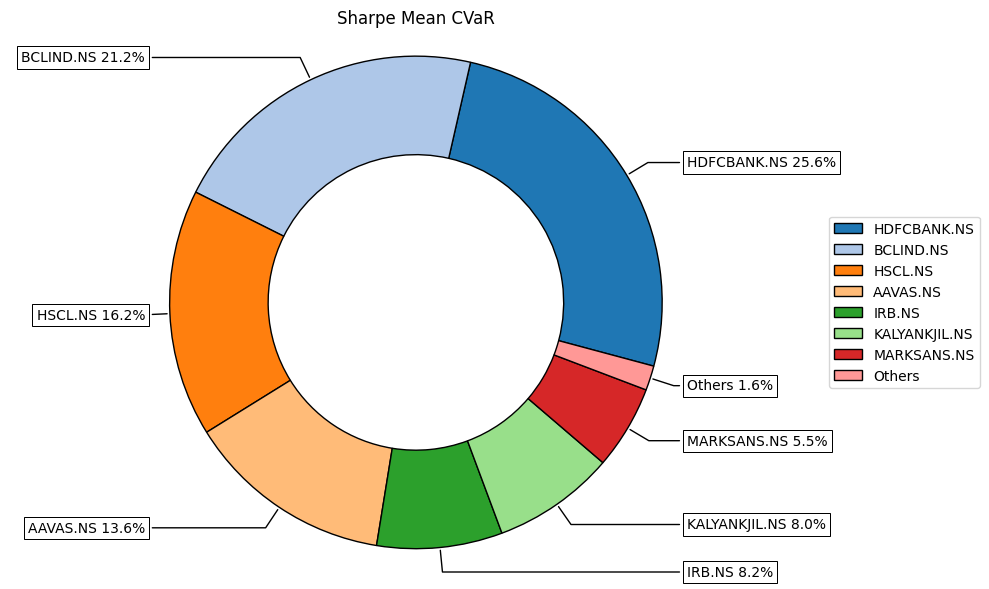

In [7]:
ax = rp.plot_pie(
    w=w,
    title="Sharpe Mean CVaR",
    others=0.05,
    nrow=25,
    cmap="tab20",
    height=6,
    width=10,
    ax=None,
)

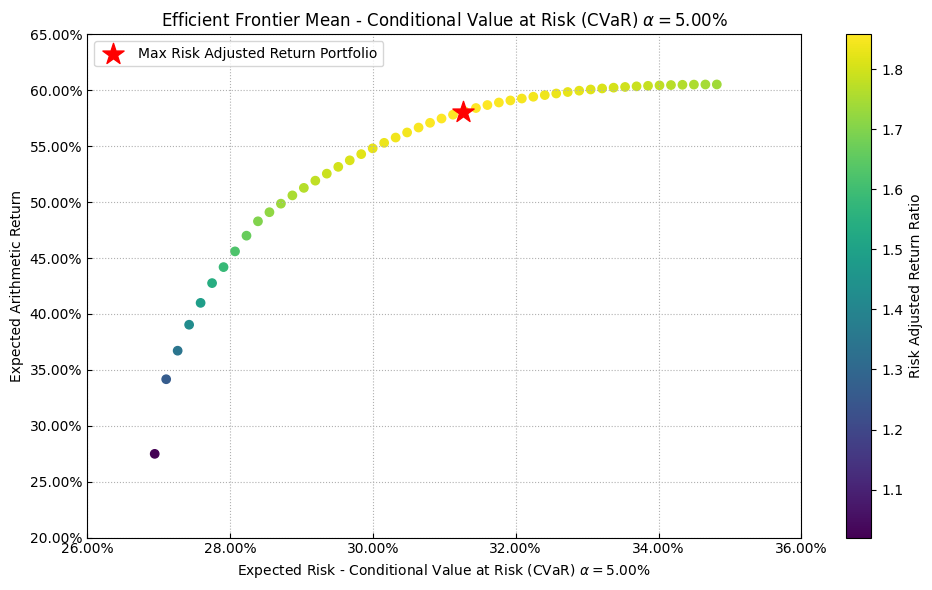

In [8]:
frontier = port.efficient_frontier(
    model=model, 
    rm=rm, 
    points=50, 
    rf=rf, 
    hist=hist
)
ax = rp.plot_frontier(
    w_frontier=frontier,
    mu=port.mu,
    cov=port.cov,
    returns=port.returns,
    rm=rm,
    rf=rf,
    cmap="viridis",
    w=w,
    label="Max Risk Adjusted Return Portfolio",
    marker="*",
)

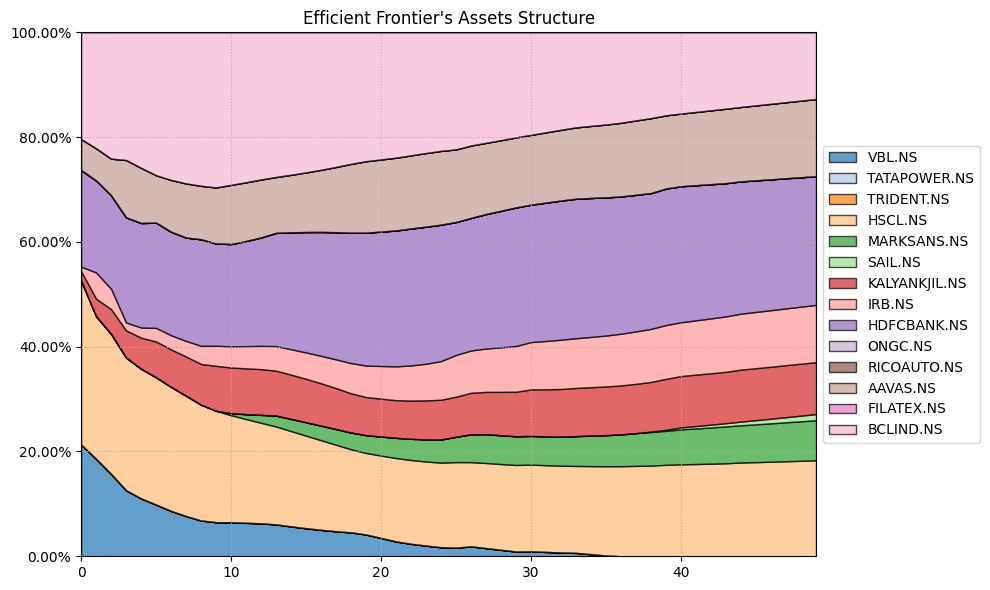

In [9]:
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)


In [10]:
if w_rp is not None:
    display(w_rp.T)
else:
    print("w_rp is None. Check the function call.")


NameError: name 'w_rp' is not defined

## New

In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2023-01-01'
end = '2024-04-20'

# Tickers of assets
assets = ['VBL.NS', 'TATAPOWER.NS', 'TRIDENT.NS', 'HSCL.NS', 'MARKSANS.NS', 'SAIL.NS', 'KALYANKJIL.NS', 'IRB.NS',
          'HDFCBANK.NS','ONGC.NS','RICOAUTO.NS','AAVAS.NS','FILATEX.NS','BCLIND.NS']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets


[*********************100%%**********************]  14 of 14 completed


In [10]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,AAVAS.NS,BCLIND.NS,FILATEX.NS,HDFCBANK.NS,HSCL.NS,IRB.NS,KALYANKJIL.NS,MARKSANS.NS,ONGC.NS,RICOAUTO.NS,SAIL.NS,TATAPOWER.NS,TRIDENT.NS,VBL.NS
Date,,,,,,,,,,,,,,
2023-01-03,-0.5613%,-1.6044%,0.3282%,0.6539%,-0.5486%,0.2548%,-0.3197%,0.2549%,-0.5982%,-0.3614%,-0.6746%,-0.2360%,0.0000%,-1.9803%
2023-01-04,-2.0244%,-1.6306%,-1.4177%,-1.7873%,-1.8556%,1.4930%,-3.1275%,0.0847%,-2.2066%,-1.2696%,-3.5088%,-1.5377%,-1.1628%,0.1416%
2023-01-05,-1.7029%,-2.3749%,-2.3230%,-0.6428%,-0.5621%,-3.5837%,1.9040%,-0.3387%,0.1709%,-2.5107%,2.5220%,-0.2403%,0.1471%,0.0229%
2023-01-06,0.8749%,1.0286%,-2.4915%,-0.3313%,-1.4388%,-1.8017%,-2.1933%,-0.9346%,0.5802%,1.8216%,-1.7163%,-1.0597%,-1.0279%,-0.6074%
2023-01-09,1.9779%,19.9903%,9.2915%,0.1944%,-0.2086%,0.6446%,3.9867%,2.0583%,0.5429%,0.3701%,2.1537%,0.3895%,-0.4451%,0.6034%


In [20]:
import riskfolio.Portfolio as pf

# Building the portfolio object
port = pf.Portfolio(returns=Y)

# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

port.solvers = ['MOSEK'] # It is recommended to use mosek when optimizing EVaR 
port.alpha = 0.05 # Significance level for CVaR, EVaR y CDaR 
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'EVaR' # Risk measure used, this time will be EVaR
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

ModuleNotFoundError: No module named 'riskfolio.Portfolio'